Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import shap

from collections import Counter

import time

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargar el dataset desde un archivo CSV y mostrar las primeras filas para obtener una vista general de los datos.
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")
df.head()


,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


In [3]:
# Se imprime información resumida del dataframe (tipos de datos, cantidad de entradas, etc.).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FOLIO_I                           4363 non-null   object 
 1   sexo                              4363 non-null   int64  
 2   edad                              4363 non-null   int64  
 3   concentracion_hemoglobina         4363 non-null   float64
 4   temperatura_ambiente              4363 non-null   int64  
 5   valor_acido_urico                 4363 non-null   float64
 6   valor_albumina                    4363 non-null   float64
 7   valor_colesterol_hdl              4363 non-null   int64  
 8   valor_colesterol_ldl              4363 non-null   float64
 9   valor_colesterol_total            4363 non-null   int64  
 10  valor_creatina                    4363 non-null   float64
 11  resultado_glucosa                 4363 non-null   float64
 12  valor_

In [4]:
# Se cuentan los valores nulos en cada columna del dataframe.
df.isnull().sum()


FOLIO_I                             0
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundamedic

Verificamos que no cuente con filas duplicadas


In [5]:
# Se imprime la cantidad de filas duplicadas en el dataset.
print(f'El dataset tiene {df.duplicated().sum()} filas duplicadas')


El dataset tiene 0 filas duplicadas


Eliminación de columnas no relevantes.

In [6]:
# Se elimina la columna 'FOLIO_I' que se considera irrelevante para el análisis.
df = df.drop('FOLIO_I', axis=1)
df.head()


,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


### Transformación de Variables: Mapeo de Género
Como primer paso, vamos a modificar los valores de la columna "sexo". Los dejaremos de la siguiente forma:
* 1 -> Masculino
* 2 -> Femenino

In [7]:
# Se crea un diccionario para mapear los valores numéricos de la columna 'sexo' a etiquetas descriptivas.
sex_map = {1: 'Masculino', 2: 'Femenino'}

# Se aplica el mapeo a la columna 'sexo'.
df['sexo'] = df['sexo'].map(sex_map)
df.head()


,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,Femenino,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,Femenino,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,Femenino,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,Masculino,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,Femenino,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


### Resumen de Variables Númericas

#### Númericas

In [8]:
# Se identifican las variables numéricas en el dataset.
num_cols = df.select_dtypes(include=['float', 'int']).columns.to_list()
print(" " * 10, f"El total de variables numéricas son = {len(num_cols)}")
for num_col in num_cols:
    print(f'* {num_col}')


           El total de variables numéricas son = 34
* edad
* concentracion_hemoglobina
* temperatura_ambiente
* valor_acido_urico
* valor_albumina
* valor_colesterol_hdl
* valor_colesterol_ldl
* valor_colesterol_total
* valor_creatina
* resultado_glucosa
* valor_insulina
* valor_trigliceridos
* resultado_glucosa_promedio
* valor_hemoglobina_glucosilada
* valor_ferritina
* valor_folato
* valor_homocisteina
* valor_proteinac_reactiva
* valor_transferrina
* valor_vitamina_bdoce
* valor_vitamina_d
* peso
* estatura
* medida_cintura
* segundamedicion_peso
* segundamedicion_estatura
* distancia_rodilla_talon
* circunferencia_de_la_pantorrilla
* segundamedicion_cintura
* tension_arterial
* sueno_horas
* masa_corporal
* actividad_total
* riesgo_hipertension


## Resumen de Variables Categóricas

In [9]:
# Se identifican las variables categóricas en el dataset.
cat_cols = df.select_dtypes(include=["object", "category"]).columns.to_list()
print(" " * 10, f"El total de variables categóricas son = {len(cat_cols)}")
for cat_col in cat_cols:
    print(f'* {cat_col}: {df[cat_col].unique()}')


           El total de variables categóricas son = 1
* sexo: ['Femenino' 'Masculino']


In [10]:
def skew_and_kurt(name: str):
    """
    Calcula la asimetría (skewness) y curtosis de una variable numérica.

    Parámetros:
    - name: nombre de la variable en el dataframe.

    Retorna:
    - skew: asimetría de la variable.
    - kurt: curtosis de la variable.
    """
    skew = df[name].skew()
    kurt = df[name].kurt()
    return skew, kurt


## Visualización de Distribuciones: Histogramas y Rug Plots

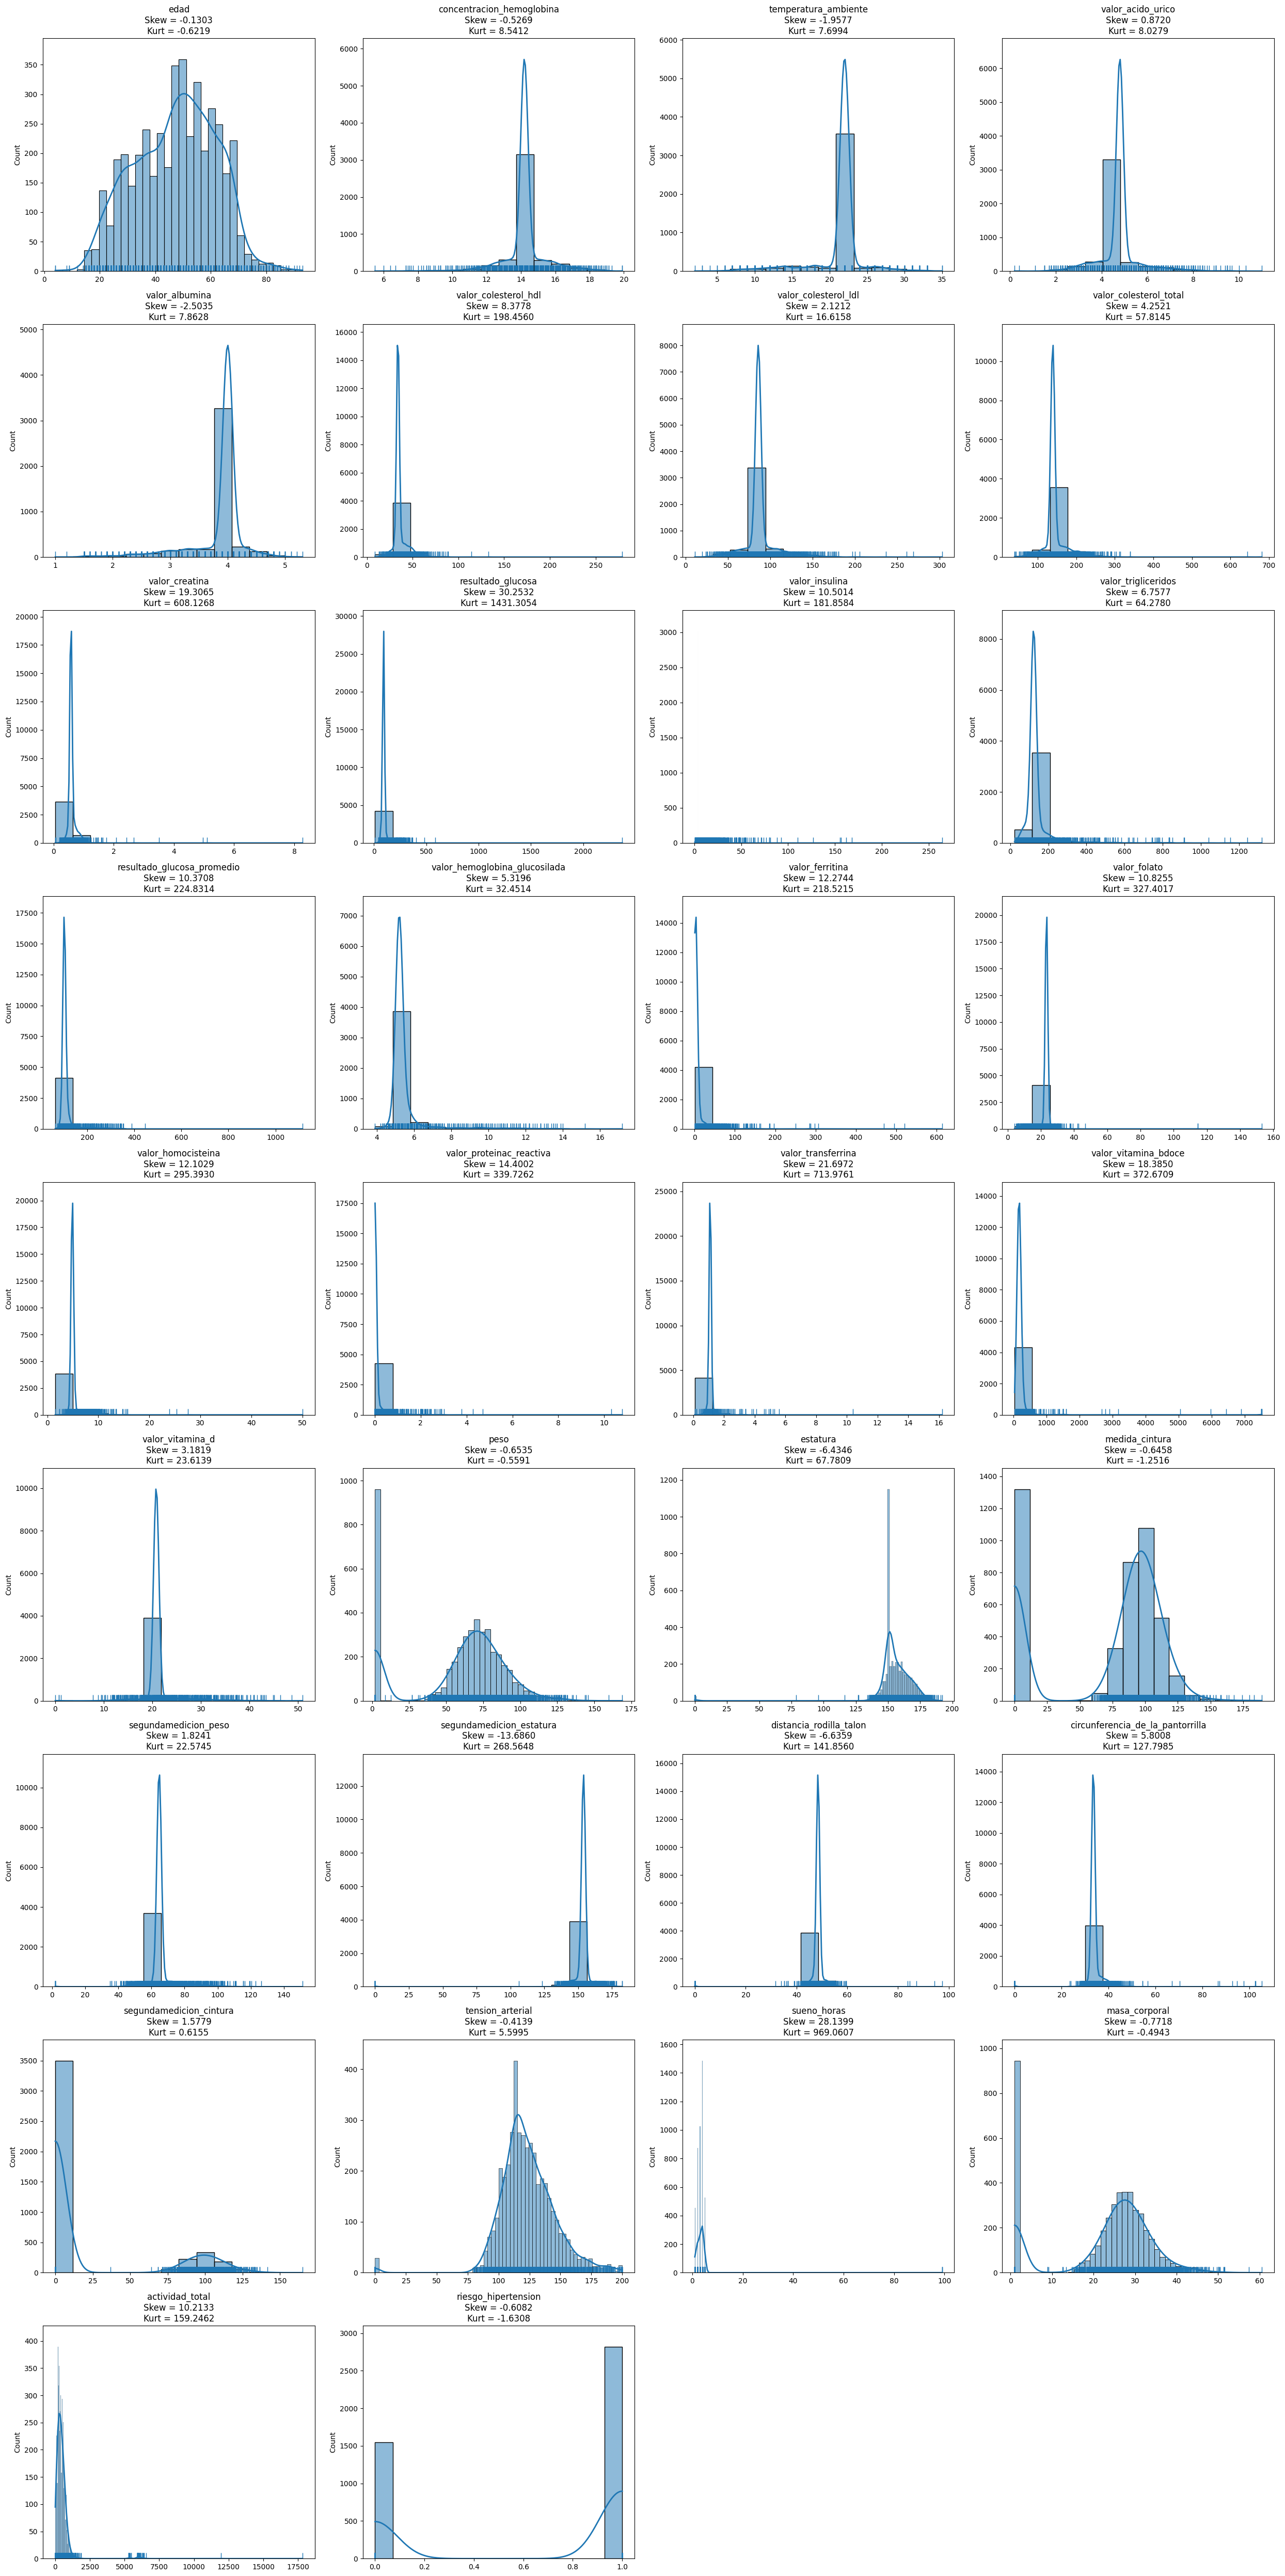

In [11]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(25, 50))
axes = axes.flat

# Se generan histogramas para cada variable numérica con curva KDE y rug plot para ver la distribución de datos.
for i, num_col in enumerate(num_cols):
    sns.histplot(df, x=num_col, stat="count", kde=True, line_kws={'linewidth': 2.0}, ax=axes[i])
    sns.rugplot(df, x=num_col, ax=axes[i])
    skew, kurt = skew_and_kurt(num_col)
    axes[i].set_title(f'{num_col}\nSkew = {skew:.4f}\nKurt = {kurt:.4f}')
    axes[i].set_xlabel("")

# Eliminar ejes sobrantes si el número total de subplots supera el número de variables.
for j in [34, 35]:
    fig.delaxes(axes[j])

fig.tight_layout()
fig.show()


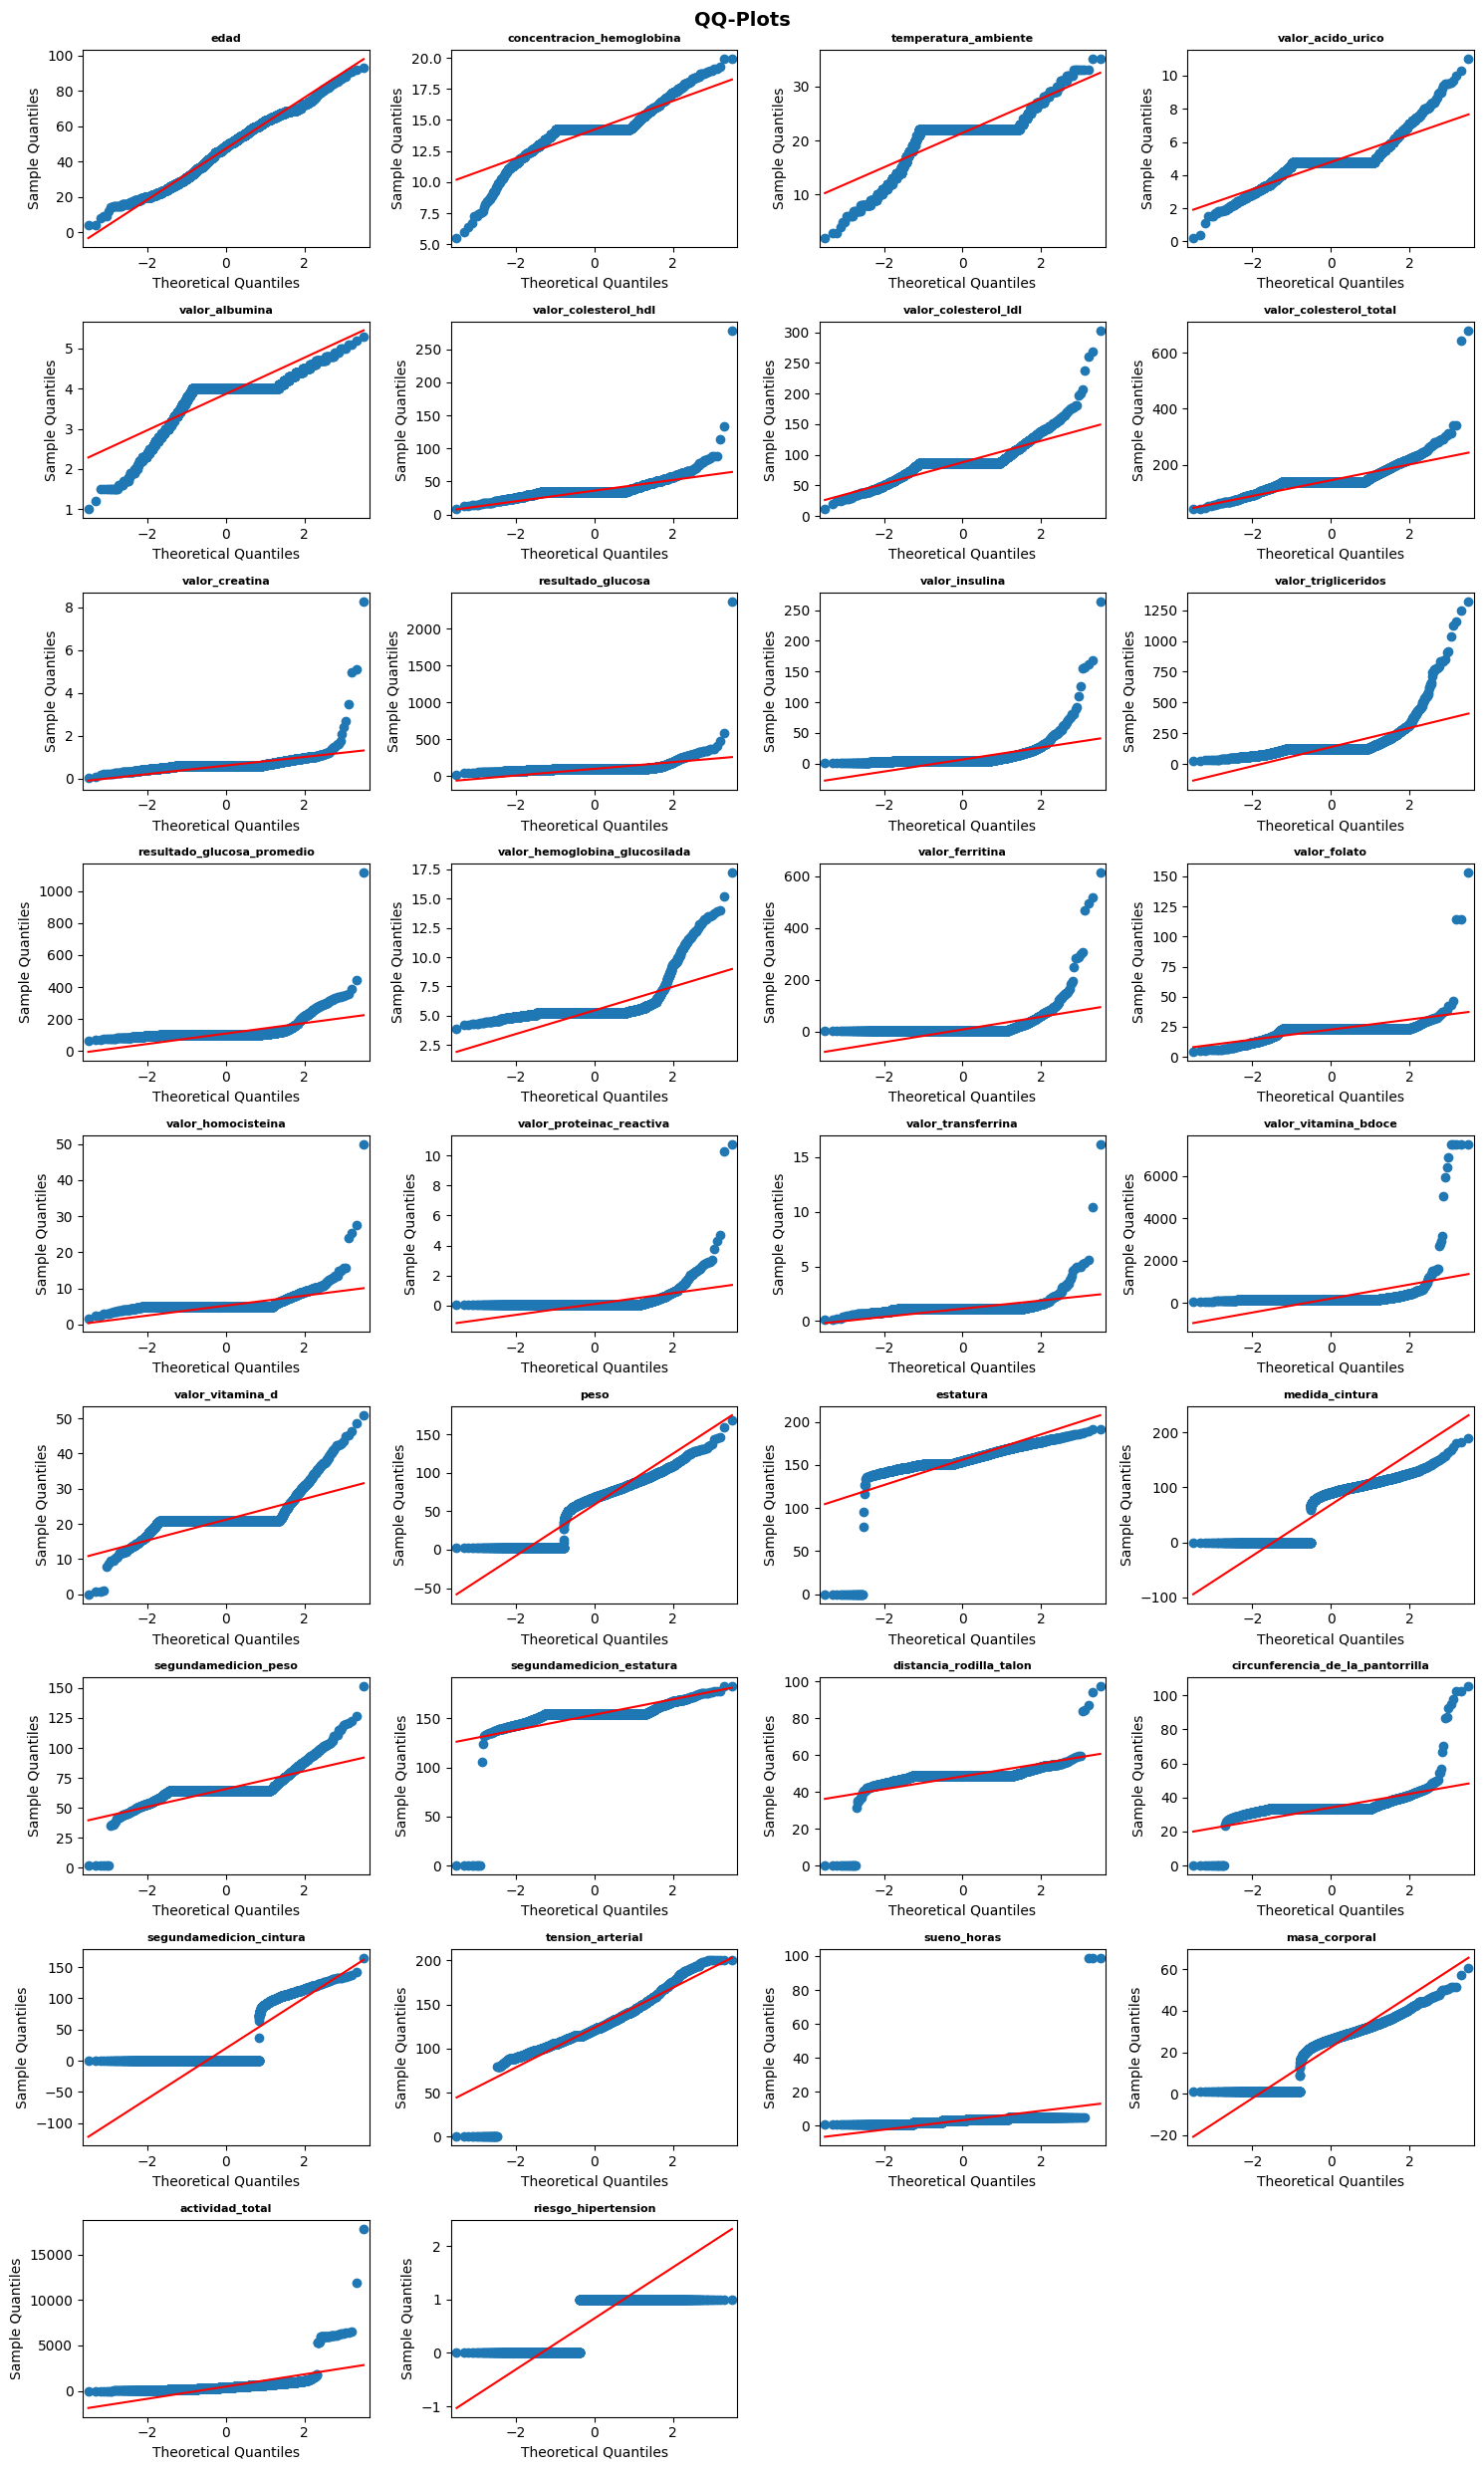

In [12]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(15, 25))
axes = axes.flat

# Se generan QQ-Plots para evaluar visualmente la normalidad de las variables numéricas.
for i, num_col in enumerate(num_cols):
    qqplot(df[num_col], line='s', ax=axes[i])
    axes[i].set_title(num_col, fontsize=8, fontweight="bold")

for j in [34, 35]:
    fig.delaxes(axes[j])

fig.suptitle("QQ-Plots", fontsize=14, fontweight="bold", color="black", y=0.99)
fig.tight_layout()
fig.show()


Según los gráficos generados (histogramas y QQ-Plots), ninguna variable sigue una distribución normal

### Distribución de la Variable 'sexo' (Género)

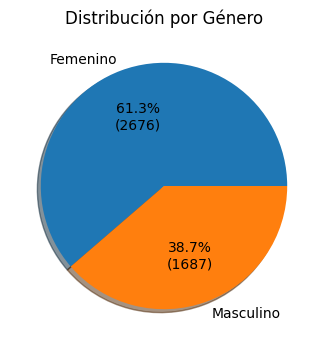

In [13]:
# Se calcula la distribución de la variable 'sexo' y se genera una gráfica de pastel.
df_class = df["sexo"].value_counts().to_frame()
labels = df_class.index.to_list()
values = df_class.iloc[:, 0].to_list()

def autopct_fun(abs_values):
    """
    Función auxiliar para mostrar el porcentaje y el valor absoluto en cada porción del gráfico de pastel.
    """
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

plt.figure(figsize=(8, 4))
plt.pie(x=values, labels=labels, autopct=autopct_fun(values), shadow=True)
plt.title('Distribución por Género')
plt.show()


### Distribución de cada variable numérica con respecto a la variable sexo

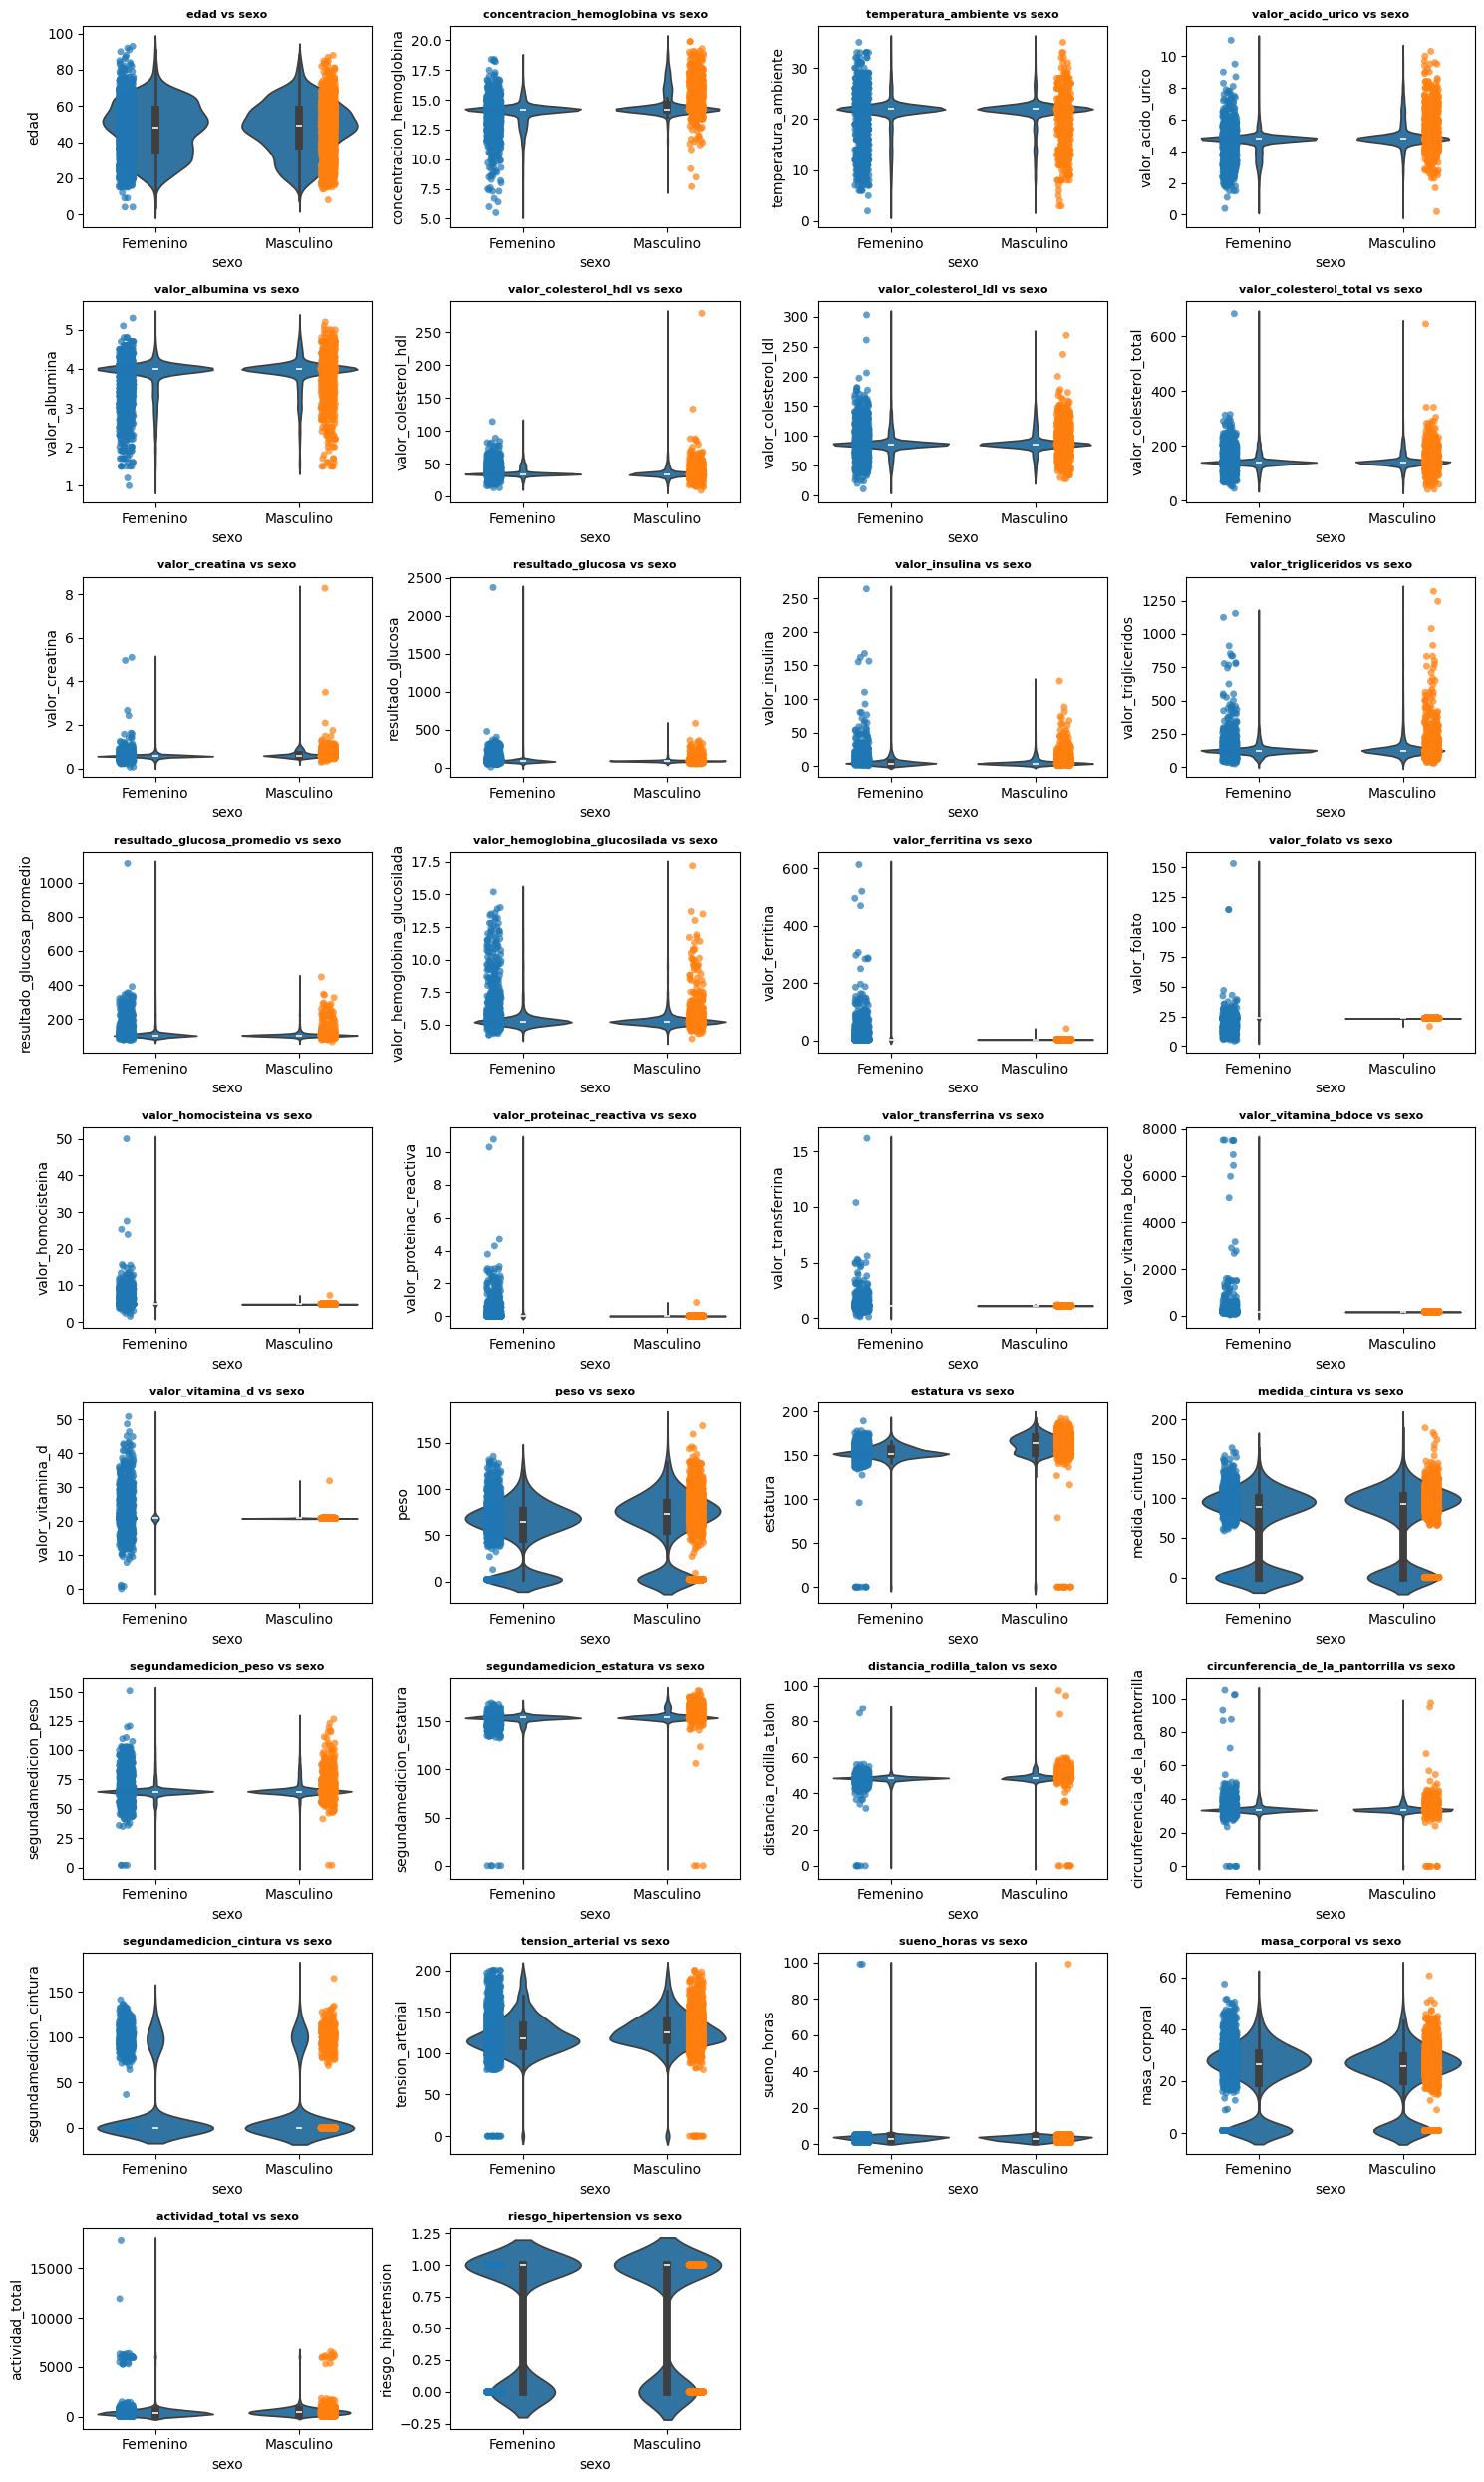

In [14]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(15, 25))
axes = axes.flat

# Se genera una gráfica de violín y strip plot para cada variable numérica segmentada por la variable 'sexo'.
for i, num_col in enumerate(num_cols):
    sns.violinplot(df, x="sexo", y=num_col, ax=axes[i])
    sns.stripplot(df, x="sexo", y=num_col, hue="sexo", ax=axes[i], dodge=True, alpha=0.7)
    axes[i].set_title(f'{num_col} vs sexo', fontsize=8, fontweight="bold", color="black")

# Eliminar ejes sobrantes.
for j in [34, 35]:
    fig.delaxes(axes[j])

fig.tight_layout()
fig.show()


### Distribución pero con respecto ya a nuestra variable objetivo **riesgo_hipertension**.

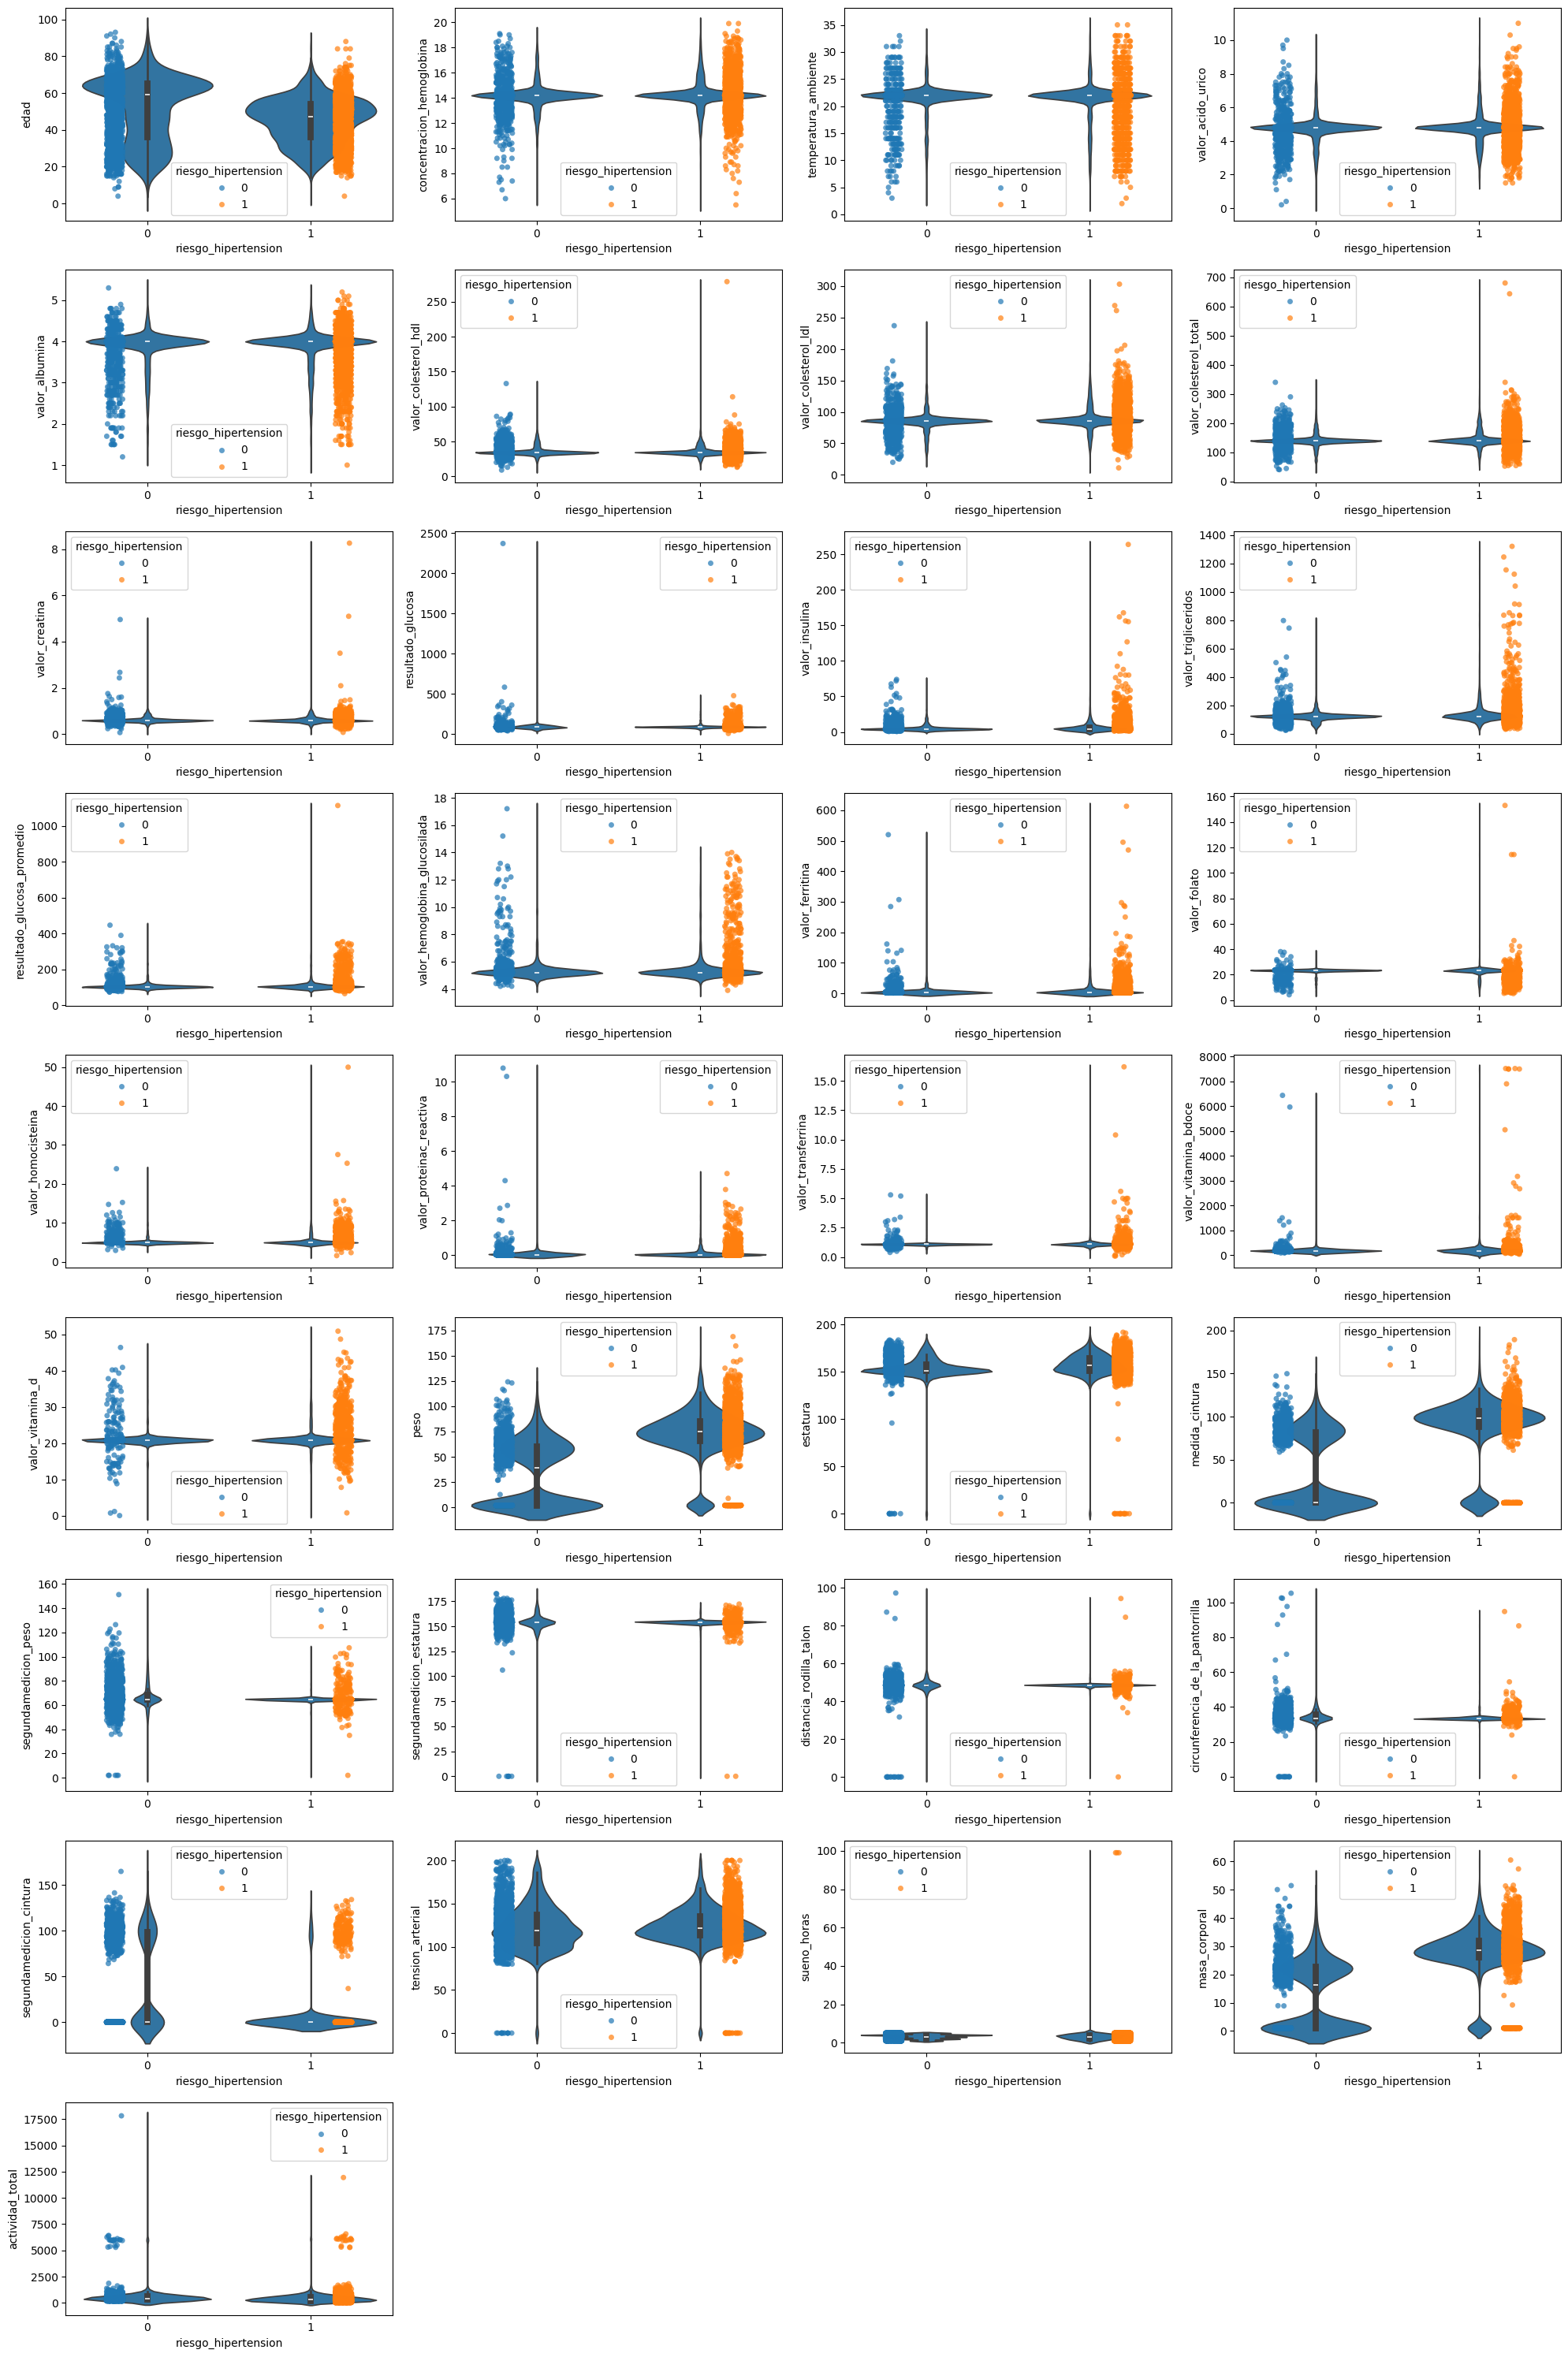

In [15]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axes = axes.flat
# Se excluye la última variable de la lista numérica si se considera que no es relevante para esta comparación.
new_num_cols = num_cols[:-1]

# Se generan gráficas de violín y strip plot para cada variable numérica, segmentadas por 'riesgo_hipertension'.
for i, num_col in enumerate(new_num_cols):
    sns.violinplot(df, x="riesgo_hipertension", y=num_col, ax=axes[i])
    sns.stripplot(df, x="riesgo_hipertension", y=num_col, hue="riesgo_hipertension", ax=axes[i], dodge=True, alpha=0.7)

# Eliminar ejes sobrantes.
for j in [33, 34, 35]:
    fig.delaxes(axes[j])

fig.tight_layout()
fig.show()


Cada una de estas celdas forma parte del análisis exploratorio de datos (EDA) que permite:

* Verificar la calidad y consistencia de los datos.

* Detectar la presencia de valores nulos, duplicados y anomalías.

* Conocer la distribución y comportamiento de las variables, tanto a nivel global como segmentado por categorías importantes como el género o el riesgo de hipertensión.

* Visualizar la forma y asimetría de los datos, lo cual es fundamental para tomar decisiones informadas sobre transformaciones, escalado y selección de modelos.

## Preprocesamiento

Para detectar posibles outliers, vamos a hacer uso del método IQR (Rango Intercuartilico)

In [16]:
import pandas as pd
import numpy as np

# Lista de variables numéricas en español
columnas_numericas = [
    "edad", "concentracion_hemoglobina", "temperatura_ambiente", "valor_acido_urico",
    "valor_albumina", "valor_colesterol_hdl", "valor_colesterol_ldl",
    "valor_colesterol_total", "valor_creatina", "resultado_glucosa",
    "valor_insulina", "valor_proteinac_reactiva", "valor_trigliceridos",
    "resultado_glucosa_promedio", "valor_hemoglobina_glucosilada",
    "valor_ferritina", "valor_folato", "valor_homocisteina", "valor_transferrina",
    "valor_vitamina_bdoce", "valor_vitamina_d", "peso", "estatura",
    "medida_cintura", "segundamedicion_peso", "segundamedicion_estatura",
    "distancia_rodilla_talon", "circunferencia_de_la_pantorrilla", "segundamedicion_cintura",
    "tension_arterial", "sueno_horas", "masa_corporal", "actividad_total"
]

# Filtrar solo las variables numéricas
df_num = df[columnas_numericas]

### MÉTODO IQR (Rango Intercuartílico) ###

# Definir función para detectar outliers con IQR
def detectar_outliers_iqr(df):
    """
    Detecta outliers en un DataFrame usando el método del rango intercuartílico (IQR).

    Parámetros:
    df (pd.DataFrame): DataFrame con las variables numéricas.

    Retorna:
    pd.DataFrame: Un DataFrame booleano donde True indica que el valor es un outlier.
    pd.Series: Conteo de outliers por columna.
    """
    Q1 = df.quantile(0.25)  # Primer cuartil
    Q3 = df.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir umbrales de detección
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Detectar valores fuera de los límites
    outliers = (df < limite_inferior) | (df > limite_superior)

    # Contar outliers por variable
    outliers_cuenta = outliers.sum()

    return outliers, outliers_cuenta

# Aplicar el método IQR para detectar outliers
outliers_iqr, outliers_iqr_cuenta = detectar_outliers_iqr(df_num)

# Mostrar el número de outliers detectados por variable
print("\nNúmero de outliers detectados por IQR:")
print(outliers_iqr_cuenta.sort_values(ascending=False))



Número de outliers detectados por IQR:
concentracion_hemoglobina           1521
valor_trigliceridos                 1349
valor_colesterol_total              1347
valor_colesterol_ldl                1337
valor_creatina                      1326
valor_acido_urico                   1318
resultado_glucosa                   1318
valor_colesterol_hdl                1306
valor_albumina                      1251
valor_hemoglobina_glucosilada       1215
resultado_glucosa_promedio          1215
valor_insulina                      1088
peso                                 991
masa_corporal                        965
distancia_rodilla_talon              919
circunferencia_de_la_pantorrilla     918
temperatura_ambiente                 912
segundamedicion_peso                 908
segundamedicion_estatura             902
segundamedicion_cintura              870
valor_ferritina                      587
valor_homocisteina                   584
valor_vitamina_d                     584
valor_folato     

En este análisis, hemos identificado que la mayoría de las variables contienen outliers, y en algunos casos, la cantidad es significativa. Sin embargo, no todos estos valores atípicos son necesariamente incorrectos o imposibles. Para mejorar la calidad de los datos, aplicaremos un enfoque basado en fuentes médicas para definir límites razonables para cada variable.

Metodología:

* Límites personalizados: Para variables con valores de referencia bien establecidos en la literatura médica, definiremos un rango de valores plausibles. Cualquier dato que se encuentre fuera de estos límites será reemplazado por la media de los valores dentro del rango aceptable.

* Imputación basada en percentiles: Para variables sin un rango médico específico, utilizaremos percentiles generales para definir límites adaptativos. Se considerarán outliers aquellos valores que se encuentren por debajo del percentil 5% o por encima del percentil 95% (o rangos similares según la variable). Estos valores serán reemplazados por la media de los datos dentro del rango válido.

In [17]:
# Definición de límites personalizados basados en referencias médicas
limites_personalizados = {
    "valor_trigliceridos": (50, 300),
    "valor_colesterol_ldl": (70, 150),
    "valor_hemoglobina_glucosilada": (5, 12),
    "tension_arterial": (80, 150),
    "colesterol_total": (110, 200),
    "resultado_glucosa": (70, 150),
    "valor_acido_urico": (3.4, 6.5),
    "valor_colesterol_hdl": (40, 60),
    "valor_albumina": (3.5, 5.0),
    "resultado_glucosa_promedio": (80, 160),
    "distancia_rodilla_talon": (35, 50),
    "circunferencia_de_la_pantorrilla": (25, 40),
    "temperatura_ambiente": (0, 40),
    "segundamedicion_peso": (50, 150),
    "segundamedicion_estatura": (130, 200),
    "segundamedicion_cintura": (60, 120),
    "valor_ferritina": (1.0, 14.5),
    "valor_vitamina_d": (20, 70),
    "valor_homocisteina": (5, 12),
    "valor_folato": (5, 18),
    "valor_vitamina_bdoce": (260, 850),
    "valor_proteinac_reactiva": (2, 9),
    "valor_transferrina": (1.2, 14.5),
    "tension_arterial": (80, 150),
    "actividad_total": (0, 10000),
    "estatura": (120, 200),
    "sueno_horas": (4, 11),
    "edad": (10, 80)
}

# Definición de percentiles generales para variables sin referencias médicas claras
percentiles_generales = {
    "valor_creatina": (0.05, 0.95),
    "valor_insulina": (0.05, 0.95),
    "peso": (0.02, 0.98),
    "masa_corporal": (0.02, 0.98),
}

### IMPUTACIÓN DE OUTLIERS BASADA EN LÍMITES PERSONALIZADOS ###

print("=== Imputación basada en límites personalizados ===")

for col, (min_val, max_val) in limites_personalizados.items():
    if col in df.columns:
        # Identificar valores fuera del rango permitido
        mask = (df[col] < min_val) | (df[col] > max_val)
        num_outliers = mask.sum()

        if num_outliers > 0:
            outliers = df.loc[mask, col]
            mean_val = df.loc[~mask, col].mean()  # Calcular la media dentro del rango permitido

            # Reemplazar outliers con la media
            df.loc[mask, col] = mean_val

            # Mostrar resultados
            print(f"Columna '{col}': {num_outliers} valores fuera del rango [{min_val}, {max_val}]")
            print(f"Media imputada en '{col}': {mean_val:.2f}\n")

### IMPUTACIÓN DE OUTLIERS BASADA EN PERCENTILES GENERALES ###

print("=== Imputación basada en percentiles generales ===")

for col, (perc_low, perc_high) in percentiles_generales.items():
    if col in df.columns:
        # Calcular los límites percentilares
        lower_bound = df[col].quantile(perc_low)
        upper_bound = df[col].quantile(perc_high)

        # Identificar valores fuera de los percentiles definidos
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        num_outliers = mask.sum()

        if num_outliers > 0:
            mean_val = df.loc[~mask, col].mean()  # Calcular la media dentro del rango aceptable

            # Reemplazar outliers con la media
            df.loc[mask, col] = mean_val

            # Mostrar resultados
            print(f"Columna '{col}': {num_outliers} valores fuera de percentiles {perc_low*100:.1f}% y {perc_high*100:.1f}%")
            print(f"Media imputada en '{col}': {mean_val:.2f}\n")

# Mostrar dimensiones del DataFrame después de la imputación
print("Dimensiones del DataFrame después de la imputación:", df.shape)


=== Imputación basada en límites personalizados ===
Columna 'valor_trigliceridos': 151 valores fuera del rango [50, 300]
Media imputada en 'valor_trigliceridos': 127.85

Columna 'valor_colesterol_ldl': 373 valores fuera del rango [70, 150]
Media imputada en 'valor_colesterol_ldl': 89.53

Columna 'valor_hemoglobina_glucosilada': 155 valores fuera del rango [5, 12]
Media imputada en 'valor_hemoglobina_glucosilada': 5.43

Columna 'tension_arterial': 482 valores fuera del rango [80, 150]
Media imputada en 'tension_arterial': 119.74

Columna 'resultado_glucosa': 238 valores fuera del rango [70, 150]
Media imputada en 'resultado_glucosa': 92.39

Columna 'valor_acido_urico': 388 valores fuera del rango [3.4, 6.5]
Media imputada en 'valor_acido_urico': 4.79

Columna 'valor_colesterol_hdl': 3753 valores fuera del rango [40, 60]
Media imputada en 'valor_colesterol_hdl': 46.92

Columna 'valor_albumina': 528 valores fuera del rango [3.5, 5.0]
Media imputada en 'valor_albumina': 4.01

Columna 'resu

Este código se centra en la preparación de los datos para un modelo de clasificación que predice el riesgo de hipertensión. Se divide en los siguientes pasos:

1. División del dataset en entrenamiento y prueba, asegurando el balance de clases con *stratify*.

2. Visualización del desbalance de clases en los conjuntos de entrenamiento y prueba.

3. Uso de *class_weight* para mitigar el problema de clases desbalanceadas.

4. Identificación de variables numéricas y categóricas para el preprocesamiento.

5. Aplicación de técnicas de preprocesamiento como *One-Hot Encoding* y *Min-Max Scaling*.

In [18]:
# Separación de variables predictoras (X) y variable objetivo (y)
X = df.drop("riesgo_hipertension", axis=1)  # Eliminamos la variable objetivo
y = df["riesgo_hipertension"]  # Definimos la variable objetivo

# Definimos la semilla para asegurar reproducibilidad
SEED = 123

# División del dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = tts(X, y,
                                       test_size=0.3,
                                       random_state=SEED,
                                       shuffle=True,
                                       stratify=y)  # Estratificación para mantener la distribución de clases


Visualización del desbalance de clases en los conjuntos de entrenamiento y prueba.

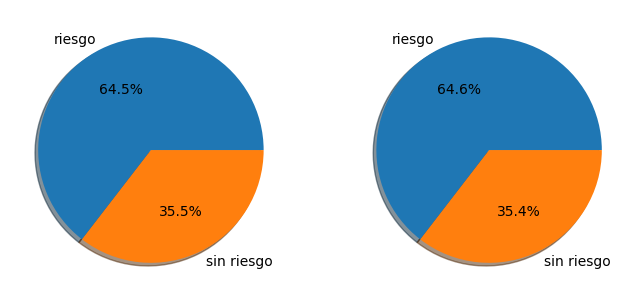

In [19]:
# Contar el número de ejemplos por clase en los conjuntos de entrenamiento y prueba
df_class_train = y_train.value_counts().to_frame()
df_class_test = y_test.value_counts().to_frame()

# Definir etiquetas de las clases
labels = ["riesgo", "sin riesgo"]

# Extraer valores de conteo para graficar
values_train = df_class_train.iloc[:, 0].to_list()
values_test = df_class_test.iloc[:, 0].to_list()

# Crear gráfico de torta (pie chart) para visualizar la distribución de clases
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax = ax.flat

ax[0].pie(x=values_train, labels=labels, autopct="%.1f%%", shadow=True)
ax[1].pie(x=values_test, labels=labels, autopct="%.1f%%", shadow=True)

# Mostrar la figura
fig.show()


In [20]:
# Como podemos visualizar, hay un desequilibrio en las clases.
# Utilizaremos la técnica "class_weight" para abordar este problema.
# Esto es crucial para reducir los falsos negativos y evitar clasificar erróneamente como "sin riesgo" a un paciente con hipertensión.

# Identificar variables numéricas
numerical_features = X_train.select_dtypes(include=["float", "int"]).columns.to_list()

# Identificar variables categóricas
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.to_list()


In [21]:
# Definimos el preprocesamiento utilizando ColumnTransformer
preprocesamiento = ColumnTransformer([
                                    ('ohe',  # Aplicar One-Hot Encoding a las variables categóricas
                                     OneHotEncoder(drop='first',  # Evita colinealidad eliminando la primera categoría
                                                   sparse_output=False,  # Mantiene formato DataFrame en salida
                                                   handle_unknown="ignore"),
                                     categorical_features),

                                    ('scaler',  # Aplicar Min-Max Scaling a las variables numéricas
                                     MinMaxScaler(),
                                     numerical_features)
                                    ],
                                    remainder="passthrough",  # Mantiene columnas no especificadas sin cambios
                                    verbose_feature_names_out=False  # Evita agregar prefijos en nombres de columnas
                                    ).set_output(transform="pandas")  # Salida como DataFrame de pandas

# Aplicar el preprocesamiento a los conjuntos de entrenamiento y prueba
X_train_prep = preprocesamiento.fit_transform(X_train)  # Ajustar y transformar datos de entrenamiento
X_test_prep = preprocesamiento.transform(X_test)  # Solo transformar datos de prueba


##Modelos

En esta parte del código se procede a la aplicación y evaluación de distintos modelos de clasificación para predecir el riesgo de hipertensión.
El flujo general es el siguiente:

1. **Cálculo del parámetro de balanceo (scale_pos_weight)**:
Se calcula para ajustar la desproporción de clases en el modelo XGBoost.

2. **Definición de modelos individuales y un ensamblaje (Stacking)**:
Se crean varios clasificadores (Random Forest, XGBoost, LightGBM) y se combina un StackingClassifier que utiliza validación cruzada para el ensamble.

3. **Entrenamiento y evaluación**:
Cada modelo se entrena, se calcula la matriz de confusión, el recall y la accuracy tanto en el conjunto de entrenamiento como en el de prueba.
Se mide el tiempo de entrenamiento para cada modelo.

4. **Visualización de resultados**:
Se definen funciones para visualizar métricas (recall y accuracy) y se muestran las matrices de confusión de algunos modelos.

In [22]:
# Se calcula el parámetro 'scale_pos_weight' para XGBoost
# Este parámetro ayuda a compensar el desbalance de clases, asignando mayor peso a la clase minoritaria.
# Se obtiene como la proporción de la cantidad de la clase mayoritaria respecto a la minoritaria en el conjunto de entrenamiento.
scale_pos_weight = Counter(y_train)[0] / Counter(y_train)[1]
scale_pos_weight  # Muestra el valor calculado


0.5494672754946728

In [23]:
# Se definen los estimadores para el StackingClassifier.
# Se utiliza XGBoost y LightGBM, configurados para manejar clases desbalanceadas.
estimators = [
    ('xgb', XGBClassifier(random_state=SEED, scale_pos_weight=scale_pos_weight)),
    ('lgbm', LGBMClassifier(random_state=SEED, class_weight="balanced", verbose=-1))
]

# Se define el estimador final para el StackingClassifier.
# ExtraTreesClassifier se utiliza con bootstrap y clase balanceada.
final_estimator = ExtraTreesClassifier(bootstrap=True, random_state=SEED, class_weight="balanced")

# Se definen modelos individuales
rf = RandomForestClassifier(random_state=SEED)
xgb = XGBClassifier(random_state=SEED, scale_pos_weight=scale_pos_weight)
lgbm = LGBMClassifier(random_state=SEED, class_weight="balanced", verbose=-1)

# Se define el StackingClassifier, que utiliza validación cruzada (cv=10)
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=10)


In [24]:
# Se crea una lista con los modelos definidos
models_list = [rf, xgb, lgbm, stacking]

# Se construye un diccionario (MODELS) donde la clave es el nombre del modelo (su clase) y el valor es la instancia del modelo.
MODELS = dict(zip([type(model).__name__ for model in models_list], models_list))


In [25]:
# Inicialización de diccionarios para almacenar métricas y resultados
cf_mx_train = {}      # Matrices de confusión en entrenamiento
cf_mx_test = {}       # Matrices de confusión en prueba
recall_train = {}     # Recall en entrenamiento
recall_test = {}      # Recall en prueba
accuracy_train = {}   # Accuracy en entrenamiento
accuracy_test = {}    # Accuracy en prueba
models_trained = {}   # Modelos ya entrenados

# Entrenamiento y evaluación de cada modelo definido en MODELS
for name, model in tqdm(MODELS.items()):

    start = time.time()  # Tiempo inicial para medir la duración del entrenamiento

    # Entrenar el modelo con el conjunto de entrenamiento preprocesado
    model.fit(X_train_prep, y_train)
    models_trained[name] = model

    # Predicciones y evaluación en el conjunto de entrenamiento
    y_pred_train = model.predict(X_train_prep)
    cf_mx_train[name] = confusion_matrix(y_train, y_pred_train)
    recall_train[name] = recall_score(y_train, y_pred_train)
    accuracy_train[name] = accuracy_score(y_train, y_pred_train)

    # Predicciones y evaluación en el conjunto de prueba
    y_pred_test = model.predict(X_test_prep)
    cf_mx_test[name] = confusion_matrix(y_test, y_pred_test)
    recall_test[name] = recall_score(y_test, y_pred_test)
    accuracy_test[name] = accuracy_score(y_test, y_pred_test)

    end = time.time()  # Tiempo final

    # Imprimir las métricas y el tiempo de entrenamiento para cada modelo
    print(f'{name}: tiempo de entrenamiento = {end - start:.4f} segundos')
    print(f'  - Recall (train/test): {recall_train[name]:.4f} / {recall_test[name]:.4f}')
    print(f'  - Accuracy (train/test): {accuracy_train[name]:.4f} / {accuracy_test[name]:.4f}')


 50%|██████████████████████▌                      | 2/4 [00:00<00:00,  6.77it/s]

RandomForestClassifier: tiempo de entrenamiento = 0.2105 segundos
  - Recall (train/test): 1.0000 / 0.9834
  - Accuracy (train/test): 1.0000 / 0.9878
XGBClassifier: tiempo de entrenamiento = 0.1033 segundos
  - Recall (train/test): 1.0000 / 0.9941
  - Accuracy (train/test): 1.0000 / 0.9924


 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00,  4.90it/s]

LGBMClassifier: tiempo de entrenamiento = 0.2708 segundos
  - Recall (train/test): 1.0000 / 0.9929
  - Accuracy (train/test): 1.0000 / 0.9931


100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.08s/it]

StackingClassifier: tiempo de entrenamiento = 3.7382 segundos
  - Recall (train/test): 1.0000 / 0.9953
  - Accuracy (train/test): 1.0000 / 0.9924


In [26]:
# Se crea una lista con los nombres de los modelos entrenados para facilitar su acceso en visualizaciones posteriores.
name_list = list(models_trained.keys())


In [27]:
def recall_plot(name: str):
    """
    Función que imprime de manera formateada las métricas de recall y accuracy
    tanto en el conjunto de entrenamiento como en el de prueba para el modelo indicado.

    Parámetro:
    - name: nombre (clave) del modelo a evaluar.
    """
    print("--" * 20)
    print(f'Modelo: {name}')
    print("--" * 20)
    print(f'Recall Train = {recall_train[name]:.4f}')
    print(f'Recall Test  = {recall_test[name]:.4f}')
    print(f'Accuracy (Train/Test): {accuracy_train[name]:.4f} / {accuracy_test[name]:.4f}')


In [28]:
# Se muestra la métrica recall y accuracy para el primer modelo en la lista
recall_plot(name_list[0])


----------------------------------------
Modelo: RandomForestClassifier
----------------------------------------
Recall Train = 1.0000
Recall Test  = 0.9834
Accuracy (Train/Test): 1.0000 / 0.9878


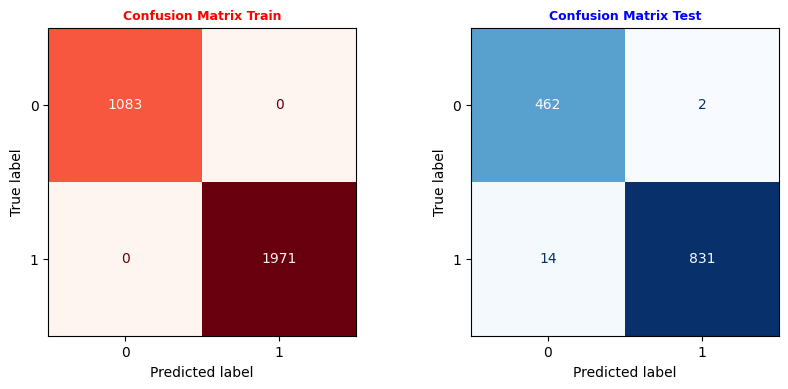

In [29]:
# Se crean dos subplots para mostrar las matrices de confusión en el conjunto de entrenamiento y de prueba para el primer modelo.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax = ax.flat

# Mostrar la matriz de confusión para el conjunto de entrenamiento
ConfusionMatrixDisplay(cf_mx_train[name_list[0]]).plot(ax=ax[0], cmap="Reds", colorbar=False)
ax[0].set_title("Confusion Matrix Train", fontsize=9, fontweight="bold", color="red")

# Mostrar la matriz de confusión para el conjunto de prueba
ConfusionMatrixDisplay(cf_mx_test[name_list[0]]).plot(ax=ax[1], cmap="Blues", colorbar=False)
ax[1].set_title("Confusion Matrix Test", fontsize=9, fontweight="bold", color="blue")

fig.show()


In [30]:
# Se imprime la métrica recall y accuracy para el segundo modelo en la lista
recall_plot(name_list[1])


----------------------------------------
Modelo: XGBClassifier
----------------------------------------
Recall Train = 1.0000
Recall Test  = 0.9941
Accuracy (Train/Test): 1.0000 / 0.9924


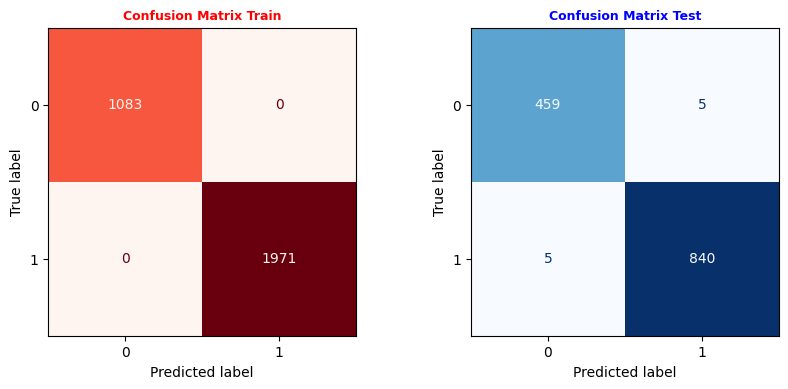

In [31]:
# Se crean dos subplots para mostrar las matrices de confusión en el conjunto de entrenamiento y de prueba para el segundo modelo.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax = ax.flat

# Mostrar la matriz de confusión para el conjunto de entrenamiento
ConfusionMatrixDisplay(cf_mx_train[name_list[1]]).plot(ax=ax[0], cmap="Reds", colorbar=False)
ax[0].set_title("Confusion Matrix Train", fontsize=9, fontweight="bold", color="red")

# Mostrar la matriz de confusión para el conjunto de prueba
ConfusionMatrixDisplay(cf_mx_test[name_list[1]]).plot(ax=ax[1], cmap="Blues", colorbar=False)
ax[1].set_title("Confusion Matrix Test", fontsize=9, fontweight="bold", color="blue")

fig.show()


In [32]:
# Se imprime la métrica recall y accuracy para el tercer modelo en la lista
recall_plot(name_list[2])


----------------------------------------
Modelo: LGBMClassifier
----------------------------------------
Recall Train = 1.0000
Recall Test  = 0.9929
Accuracy (Train/Test): 1.0000 / 0.9931


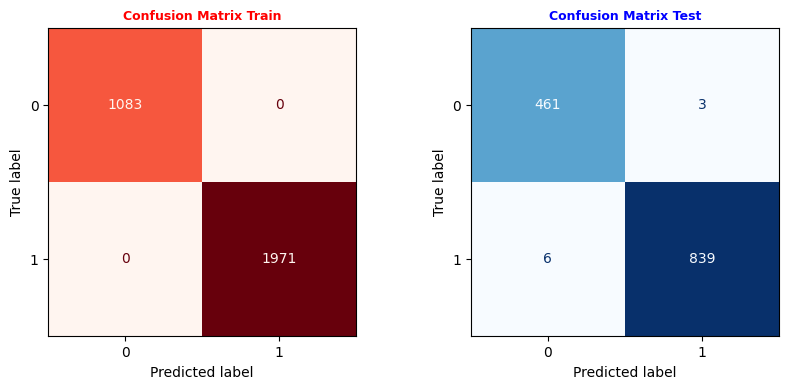

In [33]:
# Se crean dos subplots para mostrar las matrices de confusión en el conjunto de entrenamiento y de prueba para el segundo modelo.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax = ax.flat

# Mostrar la matriz de confusión para el conjunto de entrenamiento
ConfusionMatrixDisplay(cf_mx_train[name_list[2]]).plot(ax=ax[0], cmap="Reds", colorbar=False)
ax[0].set_title("Confusion Matrix Train", fontsize=9, fontweight="bold", color="red")

# Mostrar la matriz de confusión para el conjunto de prueba
ConfusionMatrixDisplay(cf_mx_test[name_list[2]]).plot(ax=ax[1], cmap="Blues", colorbar=False)
ax[1].set_title("Confusion Matrix Test", fontsize=9, fontweight="bold", color="blue")

fig.show()

In [34]:
# Se imprime la métrica recall y accuracy para el tercer modelo en la lista
recall_plot(name_list[3])

----------------------------------------
Modelo: StackingClassifier
----------------------------------------
Recall Train = 1.0000
Recall Test  = 0.9953
Accuracy (Train/Test): 1.0000 / 0.9924


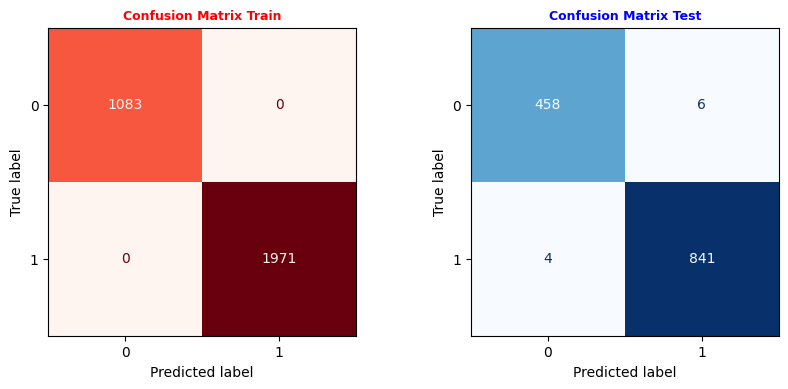

In [35]:
# Se crean dos subplots para mostrar las matrices de confusión en el conjunto de entrenamiento y de prueba para el segundo modelo.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax = ax.flat

# Mostrar la matriz de confusión para el conjunto de entrenamiento
ConfusionMatrixDisplay(cf_mx_train[name_list[3]]).plot(ax=ax[0], cmap="Reds", colorbar=False)
ax[0].set_title("Confusion Matrix Train", fontsize=9, fontweight="bold", color="red")

# Mostrar la matriz de confusión para el conjunto de prueba
ConfusionMatrixDisplay(cf_mx_test[name_list[3]]).plot(ax=ax[1], cmap="Blues", colorbar=False)
ax[1].set_title("Confusion Matrix Test", fontsize=9, fontweight="bold", color="blue")

fig.show()

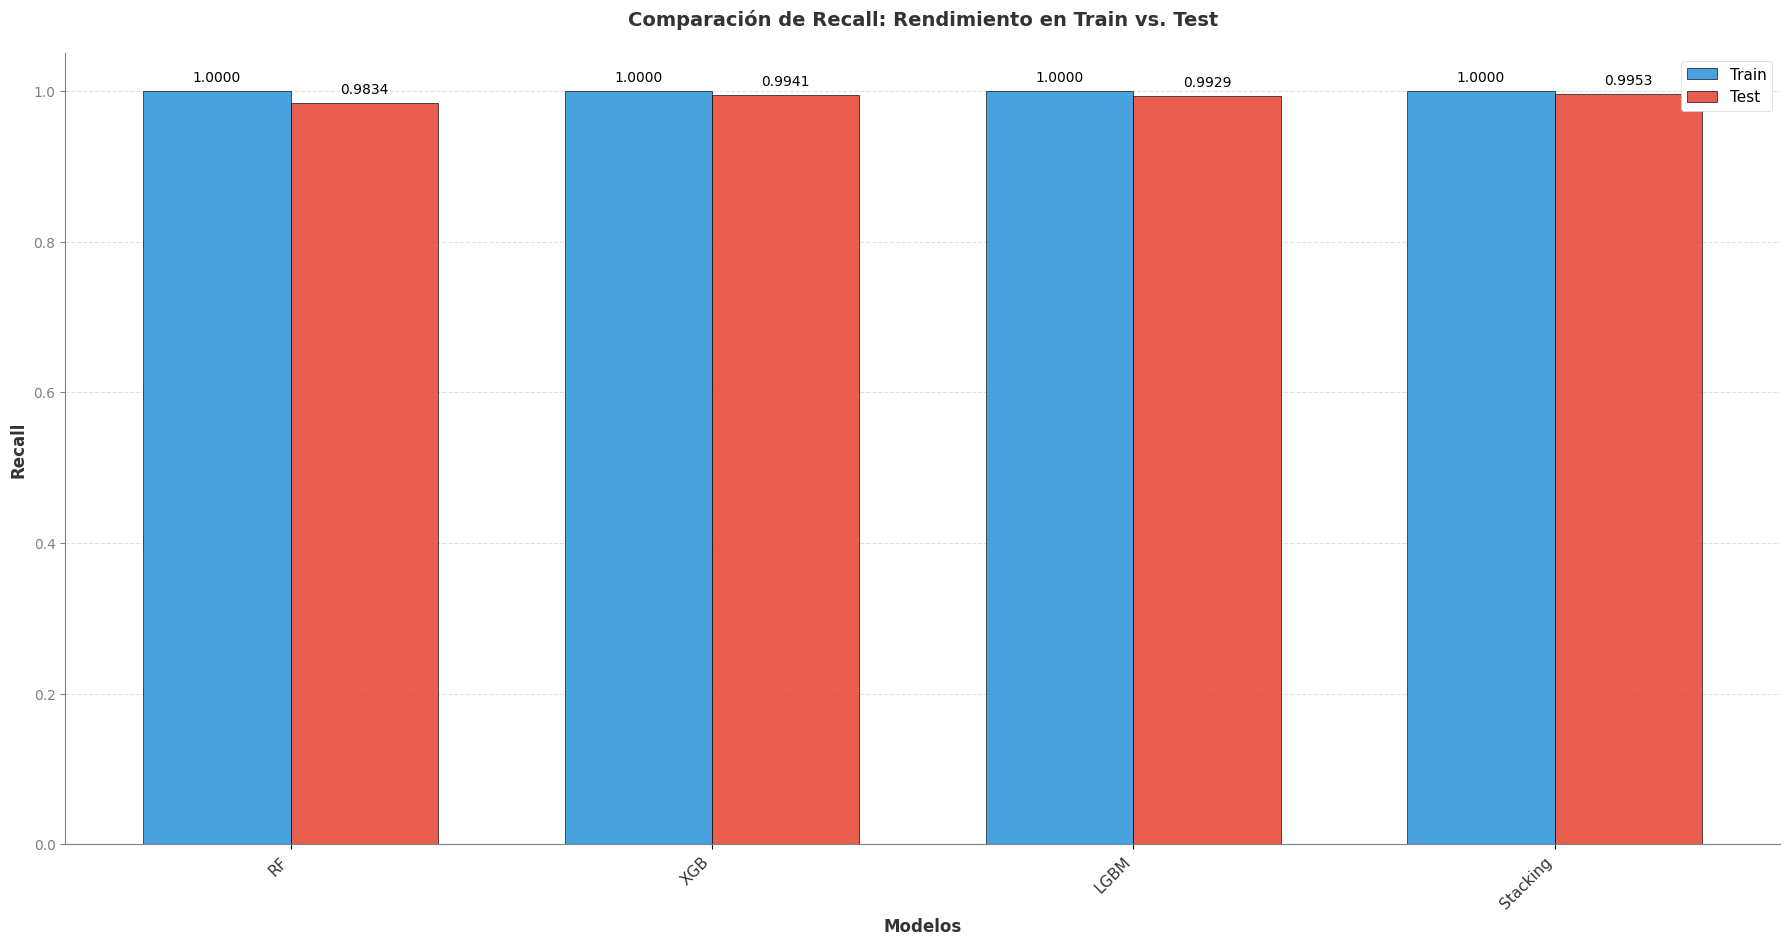

In [36]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['RF', 'XGB', 'LGBM', 'Stacking']  # nombres de modelos
values_train = [1.0, 1.0, 1.0, 1.0]       # recall en train
values_test  = [0.9834, 0.9941, 0.9929, 0.9953]       # recall en test

# Definir posiciones de las barras y el ancho de las mismas
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(18, 10))

# Gráfica de barras para recall en Train y Test
rects1 = ax.bar(x - width/2, values_train, width,
                label="Train", color="#3498db", alpha=0.9, edgecolor='black', linewidth=0.5)
rects2 = ax.bar(x + width/2, values_test, width,
                label="Test", color="#e74c3c", alpha=0.9, edgecolor='black', linewidth=0.5)

# Personalización de bordes y ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

ax.set_ylabel('Recall', fontsize=12, fontweight="bold", color="#333333")
ax.set_xlabel('Modelos', fontsize=12, fontweight="bold", color="#333333")
ax.set_title('Comparación de Recall: Rendimiento en Train vs. Test',
             fontsize=14, fontweight="bold", color="#333333", pad=20)

# Configuración de etiquetas en el eje X
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, color="#333333")
plt.xticks(rotation=45, ha='right')

# Configuración de la grilla
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgray', linestyle='dashed', alpha=0.7)
ax.tick_params(axis='y', colors='gray')

# Configuración de la leyenda
legend = ax.legend(frameon=True, loc='upper right',
                   fontsize=11, framealpha=1,
                   edgecolor='lightgray', facecolor='white')
legend.get_frame().set_linewidth(0.5)

# Función para etiquetar las barras con su valor
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

autolabel(rects1)
autolabel(rects2)

# Personalización del fondo
fig.set_facecolor('white')
ax.set_facecolor('white')
fig.tight_layout()

plt.subplots_adjust(bottom=0.15)
plt.show()


### Visualización con SHAP
El siguiente código utiliza SHAP (SHapley Additive exPlanations) para interpretar la importancia de las características en la predicción del modelo.

Importancia de SHAP:

* Interpretabilidad: Permite comprender la contribución individual de cada característica en las predicciones.

* Transparencia: Facilita la explicación de modelos complejos como los basados en árboles.

* Diagnóstico: Ayuda a identificar posibles sesgos o comportamientos inesperados del modelo.

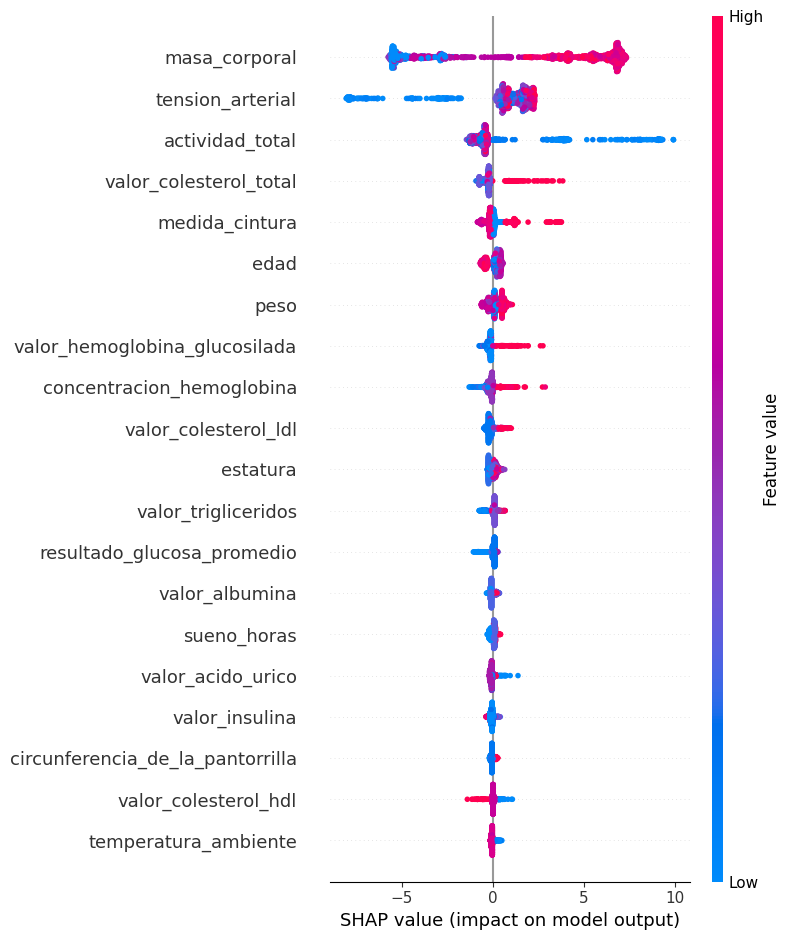

In [37]:
# Inicialización de los gráficos interactivos de SHAP
shap.initjs()

# Se crea el objeto explicador utilizando el modelo XGBoost entrenado
explainer = shap.TreeExplainer(models_trained["XGBClassifier"])

# Cálculo de los valores SHAP para el conjunto de prueba preprocesado
shap_values = explainer.shap_values(X_test_prep)

# Visualización del resumen de la importancia de las características mediante SHAP
shap.summary_plot(shap_values, X_test_prep)


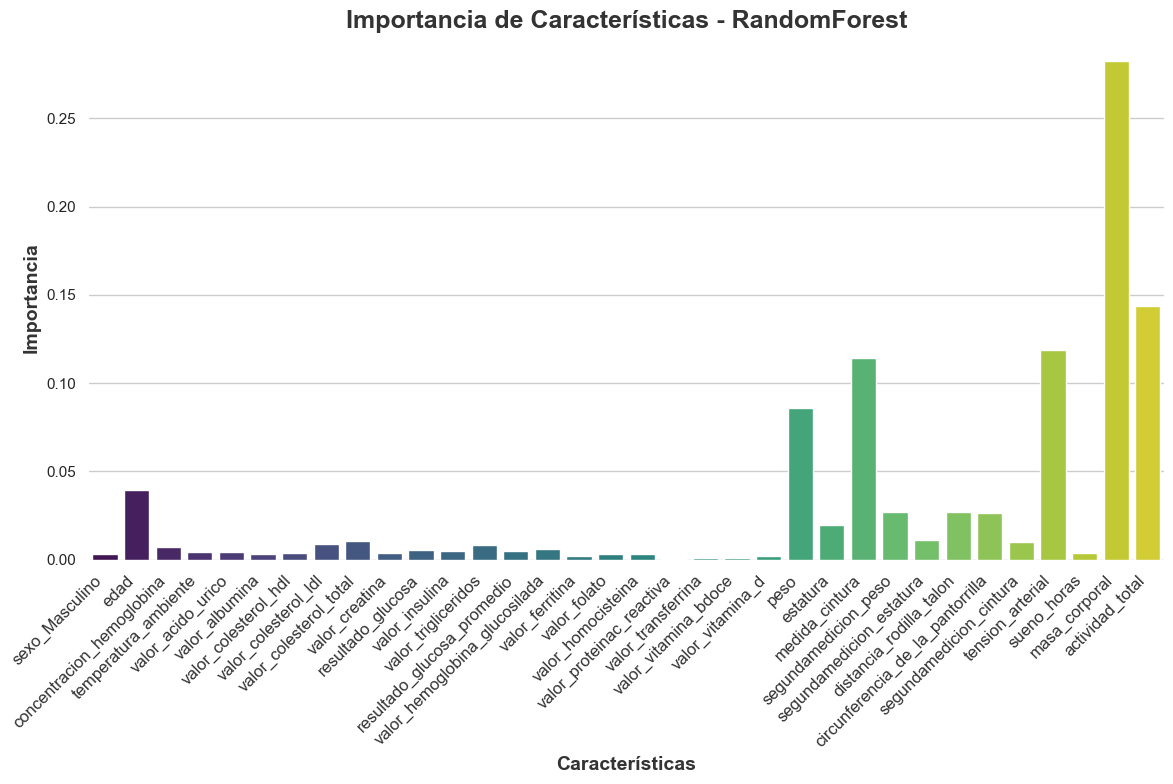

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Se obtiene la importancia de características del modelo RandomForest
feature_importance = models_trained["RandomForestClassifier"].feature_importances_

# Crear la figura y el eje
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=X_train_prep.columns, y=feature_importance, palette="viridis")

# Configuración de títulos y etiquetas
ax.set_title('Importancia de Características - RandomForest', fontsize=18, fontweight='bold', color="#333333")
ax.set_xlabel('Características', fontsize=14, fontweight="bold", color="#333333")
ax.set_ylabel('Importancia', fontsize=14, fontweight="bold", color="#333333")

# Rotación y estilo de las etiquetas del eje X
plt.xticks(rotation=45, ha="right", fontsize=12, color="#333333")

# Remover bordes innecesarios para un look más limpio
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()
